In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import json
from textwrap import fill

In [2]:
df_2015 = pd.read_csv('2015_data.csv', low_memory=False)
codes = json.load(open('2015_codes.json'))

In [3]:
# Convert columns to strings
df_2015['resident_status'] = df_2015['resident_status'].astype(str)
df_2015['education_2003_revision'] = df_2015['education_2003_revision'].astype(str)
df_2015['marital_status'] = df_2015['marital_status'].astype(str)
df_2015['sex'] = df_2015['sex'].astype(str)

# Create age slider
age_slider = widgets.IntSlider(
    value=30,
    min=0,
    max=100,
    step=1,
    description='Age:'
)

# Create resident_status dropdown
resident_status_dropdown = widgets.Dropdown(
    options=['RESIDENTS', 'INTRASTATE NONRESIDENTS', 'INTERSTATE NONRESIDENTS', 'FOREIGN RESIDENTS'],
    value='RESIDENTS',
    description='Resident Status:'
)

# Create education dropdown
education_dropdown = widgets.Dropdown(
    options=['8th grade or less', '9 - 12th grade, no diploma', 'high school graduate or GED completed', 'some college credit, but no degree', 'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Doctorate or professional degree', 'Unknown'],
    value='Unknown',
    description='Education:'
)

# Create marital_status dropdown
marital_status_dropdown = widgets.Dropdown(
    options=['Never married, single', 'Married', 'Widowed', 'Divorced', 'Marital Status unknown'],
    value='Marital Status unknown',
    description='Marital Status:'
)

# Create gender dropdown
gender_dropdown = widgets.Dropdown(
    options=['Male', 'Female'],
    value='Male',
    description='Gender:'
)

# Create output widget
output = widgets.Output()

# Display the interface and output widget
display(age_slider, resident_status_dropdown, education_dropdown, marital_status_dropdown, gender_dropdown, output)

def top10percentages(arr):
    # Get the indices of the top 10 largest numbers
    top_indices = np.argpartition(arr, -10)[-10:]

    # Get the values of the top 10 largest numbers
    top_numbers = arr[top_indices]

    # Sort the top numbers in descending order
    sorted_indices = np.argsort(top_numbers)[::-1]
    top_numbers = top_numbers[sorted_indices]
    top_indices = top_indices[sorted_indices]

    return top_numbers, top_indices

def update_visualization(change):
    with output:
        # Clear previous output
        clear_output()

        age = age_slider.value
        resident_status = resident_status_dropdown.value
        education = education_dropdown.value
        marital_status = marital_status_dropdown.value
        gender = gender_dropdown.value

        # Map selected label to gender code
        gender_code = {
            'Male': 'M',
            'Female': 'F'
        }

        # Map selected label to resident_status code
        resident_status_code = {
            'RESIDENTS': '1',
            'INTRASTATE NONRESIDENTS': '2',
            'INTERSTATE NONRESIDENTS': '3',
            'FOREIGN RESIDENTS': '4'
        }

        # Map selected label to education code
        education_code = {
            '8th grade or less': '1.0',
            '9 - 12th grade, no diploma': '2.0',
            'high school graduate or GED completed': '3.0',
            'some college credit, but no degree': '4.0',
            'Associate degree': '5.0',
            'Bachelor’s degree': '6.0',
            'Master’s degree': '7.0',
            'Doctorate or professional degree': '8.0',
            'Unknown': '9.0'
        }

        # Map selected label to marital_status code
        marital_status_code = {
            'Never married, single': 'S',
            'Married': 'M',
            'Widowed': 'W',
            'Divorced': 'D',
            'Marital Status unknown': 'U'
        }

        filter = None
        filter = df_2015["sex"] == gender_code[gender]
        if filter is not None:
            filter = filter & (df_2015["detail_age"] == int(age))
        else:
            filter = df_2015["detail_age"] == int(age)
        if filter is not None:
            filter = filter & (df_2015["resident_status"] == resident_status_code[resident_status])
        else:
            filter = df_2015["resident_status"] == resident_status_code[resident_status]
        if filter is not None:
            filter = filter & (df_2015["education_2003_revision"] == education_code[education])
        else:
            filter = df_2015["education_2003_revision"] == education_code[education]
        if filter is not None:
            filter = filter & (df_2015["marital_status"] == marital_status_code[marital_status])
        else:
            filter = df_2015["marital_status"] == marital_status_code[marital_status]

        if filter is not None:
            filtered_data = df_2015[filter]
        else:
            filtered_data = df_2015
        filtered_data = filtered_data.value_counts("358_cause_recode").sort_values(ascending=False).to_dict()
        final_data = {}
        for key, value in filtered_data.items():
            final_data[codes["358_cause_recode"][str(key).zfill(3)]] = value

        total = sum(list(final_data.values()))
        som = 0
        for key, value in list(final_data.items()):
            if som < 0.9 * total and value > 0.03 * total:
                som += value
            else:
                final_data.pop(key)
        if (total - som > 0):
            final_data["Others"] = total - som

        copyData = {}
        for key, value in final_data.items():
            copyData[fill(key, 30)] = value

        final_data = copyData
        print(final_data)

        plt.figure(figsize=(15, 18))
        plt.pie(list(final_data.values()), labels=list(final_data.keys()), autopct='%1.1f%%', rotatelabels=True)
        plt.title("Causes of Death", pad=200)
        plt.savefig("pie_chart.png")
        plt.show()

# Call the update_visualization function when any of the widget values change
age_slider.observe(update_visualization, 'value')
resident_status_dropdown.observe(update_visualization, 'value')
education_dropdown.observe(update_visualization, 'value')
marital_status_dropdown.observe(update_visualization, 'value')
gender_dropdown.observe(update_visualization, 'value')

IntSlider(value=30, description='Age:')

Dropdown(description='Resident Status:', options=('RESIDENTS', 'INTRASTATE NONRESIDENTS', 'INTERSTATE NONRESID…

Dropdown(description='Education:', index=8, options=('8th grade or less', '9 - 12th grade, no diploma', 'high …

Dropdown(description='Marital Status:', index=4, options=('Never married, single', 'Married', 'Widowed', 'Divo…

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Output()

IntSlider(value=30, description='Age:')

Dropdown(description='Hispanic origin:', index=8, options=('Mexican', 'Puerto Rican', 'Cuban', 'Central or Sou…

Dropdown(description='Education:', index=8, options=('8th grade or less', '9 - 12th grade, no diploma', 'high …

Dropdown(description='Marital Status:', index=4, options=('Never married, single', 'Married', 'Widowed', 'Divo…

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Output()

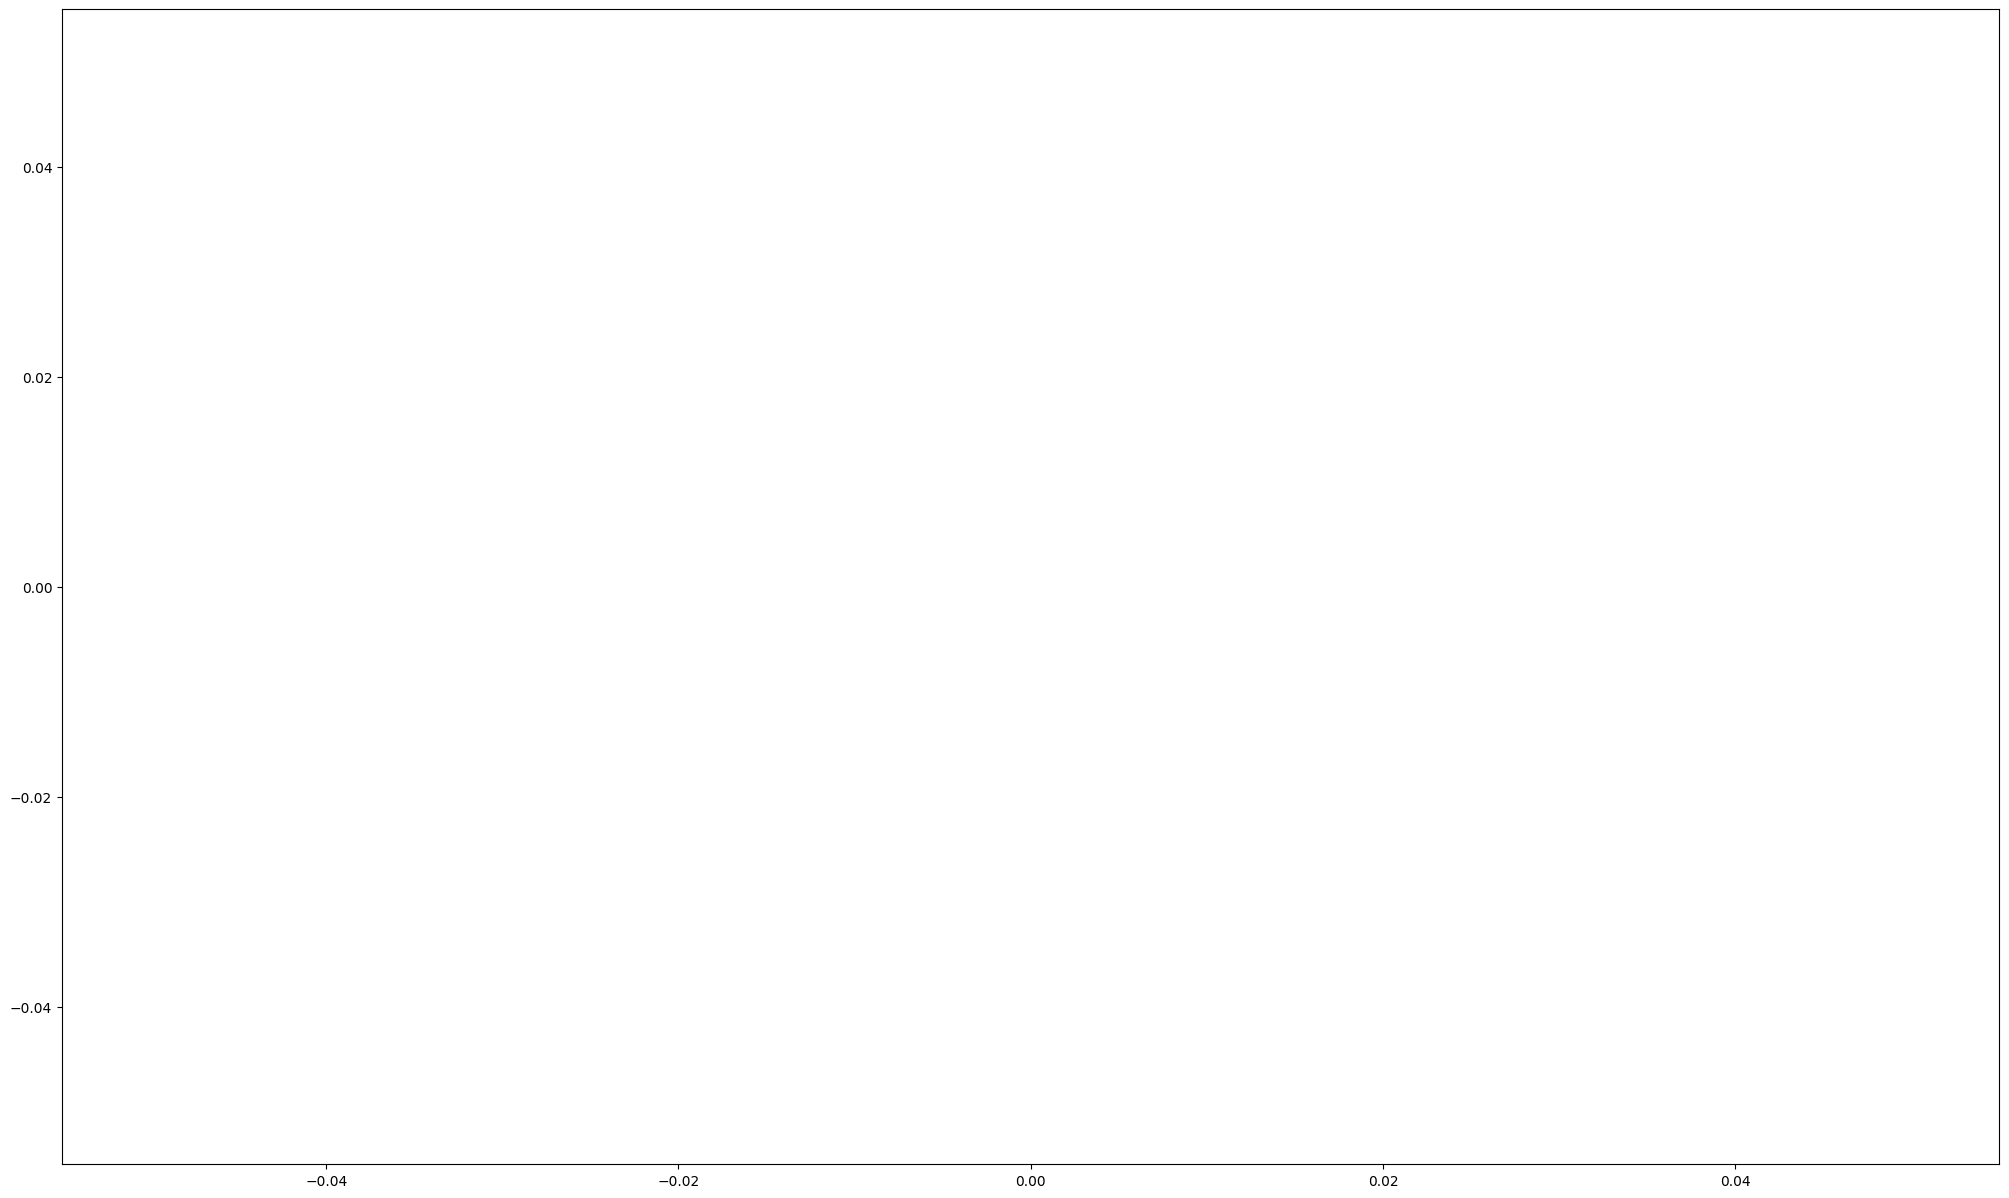

In [5]:
# Convert columns to strings
df_2015['hispanic_originrace_recode'] = df_2015['hispanic_originrace_recode'].astype(str)
df_2015['education_2003_revision'] = df_2015['education_2003_revision'].astype(str)
df_2015['marital_status'] = df_2015['marital_status'].astype(str)
df_2015['sex'] = df_2015['sex'].astype(str)

# Create age slider
age_slider = widgets.IntSlider(
    value=30,
    min=0,
    max=100,
    step=1,
    description='Age:'
)

# Create resident_status dropdown
hispanic_origin_dropdown = widgets.Dropdown(
    options=['Mexican', 'Puerto Rican', 'Cuban', 'Central or South American', 'Other or unknown Hispanic', 'Non - Hispanic white', 'Non - Hispanic black', 'Non - Hispanic other races', 'Hispanic origin unknown'],
    value='Hispanic origin unknown',
    description='Hispanic origin:'
)

# Create education dropdown
education_dropdown = widgets.Dropdown(
    options=['8th grade or less', '9 - 12th grade, no diploma', 'high school graduate or GED completed', 'some college credit, but no degree', 'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Doctorate or professional degree', 'Unknown'],
    value='Unknown',
    description='Education:'
)

# Create marital_status dropdown
marital_status_dropdown = widgets.Dropdown(
    options=['Never married, single', 'Married', 'Widowed', 'Divorced', 'Marital Status unknown'],
    value='Marital Status unknown',
    description='Marital Status:'
)

# Create gender dropdown
gender_dropdown = widgets.Dropdown(
    options=['Male', 'Female'],
    value='Male',
    description='Gender:'
)

# Create output widget
output = widgets.Output()

# Display the interface and output widget
display(age_slider, hispanic_origin_dropdown, education_dropdown, marital_status_dropdown, gender_dropdown, output)

def top10percentages(arr):
    # Get the indices of the top 10 largest numbers
    top_indices = np.argpartition(arr, -10)[-10:]

    # Get the values of the top 10 largest numbers
    top_numbers = arr[top_indices]

    # Sort the top numbers in descending order
    sorted_indices = np.argsort(top_numbers)[::-1]
    top_numbers = top_numbers[sorted_indices]
    top_indices = top_indices[sorted_indices]

    return top_numbers, top_indices

def update_visualization(change):
    with output:
        # Clear previous output
        clear_output()

        age = age_slider.value
        hispanic_origin = hispanic_origin_dropdown.value
        education = education_dropdown.value
        marital_status = marital_status_dropdown.value
        gender = gender_dropdown.value

        # Map selected label to education code
        hispanic_origin_code = {
            'Mexican': '1',
            'Puerto Rican': '2',
            'Cuban': '3',
            'Central or South American': '4',
            'Other or unknown Hispanic': '5',
            'Non - Hispanic white': '6',
            'Non - Hispanic black': '7',
            'Non - Hispanic other races': '8',
            'Hispanic origin unknown': '9'
        }

        # Map selected label to education code
        education_code = {
            '8th grade or less': '1.0',
            '9 - 12th grade, no diploma': '2.0',
            'high school graduate or GED completed': '3.0',
            'some college credit, but no degree': '4.0',
            'Associate degree': '5.0',
            'Bachelor’s degree': '6.0',
            'Master’s degree': '7.0',
            'Doctorate or professional degree': '8.0',
            'Unknown': '9.0'
        }

        # Map selected label to marital_status code
        marital_status_code = {
            'Never married, single': 'S',
            'Married': 'M',
            'Widowed': 'W',
            'Divorced': 'D',
            'Marital Status unknown': 'U'
        }

        # Map selected label to gender code
        gender_code = {
            'Male': 'M',
            'Female': 'F'
        }

        filter = None
        filter = df_2015["sex"] == gender_code[gender]
        if filter is not None:
            filter = filter & (df_2015["detail_age"] == int(age))
        else:
            filter = df_2015["detail_age"] == int(age)
        if filter is not None:
            filter = filter & (df_2015["hispanic_originrace_recode"] == hispanic_origin_code[hispanic_origin])
        else:
            filter = df_2015["hispanic_originrace_recode"] == hispanic_origin_code[hispanic_origin]
        if filter is not None:
            filter = filter & (df_2015["education_2003_revision"] == education_code[education])
        else:
            filter = df_2015["education_2003_revision"] == education_code[education]
        if filter is not None:
            filter = filter & (df_2015["marital_status"] == marital_status_code[marital_status])
        else:
            filter = df_2015["marital_status"] == marital_status_code[marital_status]

        if filter is not None:
            filtered_data = df_2015[filter]
        else:
            filtered_data = df_2015
        filtered_data = filtered_data.value_counts("358_cause_recode").sort_values(ascending=False).to_dict()
        final_data = {}
        for key, value in filtered_data.items():
            final_data[codes["358_cause_recode"][str(key).zfill(3)]] = value

        total = sum(list(final_data.values()))
        som = 0
        for key, value in list(final_data.items()):
            if som < 0.9 * total and value > 0.03 * total:
                som += value
            else:
                final_data.pop(key)
        if (total - som > 0):
            final_data["Others"] = total - som

        copyData = {}
        for key, value in final_data.items():
            copyData[fill(key, 30)] = value

        final_data = copyData
        print(final_data)

        plt.figure(figsize=(25, 15))
        plt.barh(list(final_data.keys()), list(final_data.values()))
        for index, value in enumerate(list(final_data.values())):
            plt.text(value, index, str(round(value / total * 100, 1)) + "%")
        plt.xlim(0, 1.1 * max(list(final_data.values())))
        plt.title("Causes of Death")
        plt.ylabel("Cause of Death")
        plt.show()

# Call the update_visualization function when any of the widget values change
age_slider.observe(update_visualization, 'value')
resident_status_dropdown.observe(update_visualization, 'value')
education_dropdown.observe(update_visualization, 'value')
marital_status_dropdown.observe(update_visualization, 'value')
gender_dropdown.observe(update_visualization, 'value')

In [7]:
# Convert columns to strings
df_2015['education_2003_revision'] = df_2015['education_2003_revision'].astype(str)
df_2015['race_recode_5'] = df_2015['race_recode_5'].astype(str)
df_2015['sex'] = df_2015['sex'].astype(str)

# Create age slider
age_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Age:'
)

# Create race dropdown
race_dropdown = widgets.Dropdown(
    options=['Other (Puerto Rico only)', 'White', 'Black', 'American Indian', 'Asian or Pacific Islander'],
    value='Black',
    description='Race:'
)

# Create gender dropdown
gender_dropdown = widgets.Dropdown(
    options=['Male', 'Female'],
    value='Male',
    description='Gender:'
)

# Create output widget
output = widgets.Output()

# Display the interface and output widget
display(age_slider, race_dropdown, gender_dropdown, output)

def top10percentages(arr):
    # Get the indices of the top 10 largest numbers
    top_indices = np.argpartition(arr, -10)[-10:]

    # Get the values of the top 10 largest numbers
    top_numbers = arr[top_indices]

    # Sort the top numbers in descending order
    sorted_indices = np.argsort(top_numbers)[::-1]
    top_numbers = top_numbers[sorted_indices]
    top_indices = top_indices[sorted_indices]

    return top_numbers, top_indices

def update_visualization(change):
    with output:
        # Clear previous output
        clear_output()

        age = age_slider.value
        race_status = race_dropdown.value
        gender = gender_dropdown.value

        # Map selected label to gender code
        gender_code = {
            'Male': 'M',
            'Female': 'F'
        }

        # Map selected label to race code
        race_code = {
            'Other (Puerto Rico only)': '0',
            'White': '1',
            'Black': '2',
            'American Indian': '3',
            'Asian or Pacific Islander': '4'
        }

        # for key, value in codes["race"].items():
        #     if value == race_status:
        #         race_num = key

        # Filter df_2015 based on user's selections

        filter = None
        filter = df_2015["sex"] == gender_code[gender]
        if filter is not None:
            filter = filter & (df_2015["detail_age"] == int(age))
        else:
            filter = df_2015["detail_age"] == int(age)
        if filter is not None:
            filter = filter & (df_2015["race_recode_5"] == race_code[race_status])
        else:
            filter = df_2015["race_recode_5"] == race_code[race_status]
        if filter is not None:
            filtered_data = df_2015[filter]
        else:
            filtered_data = df_2015
        filtered_data = filtered_data.value_counts("358_cause_recode").sort_values(ascending=False).to_dict()
        final_data = {}
        for key, value in filtered_data.items():
            final_data[codes["358_cause_recode"][str(key).zfill(3)]] = value

        total = sum(list(final_data.values()))
        som = 0
        for key, value in list(final_data.items()):
            if som < 0.9 * total and value > 0.03 * total:
                som += value
            else:
                final_data.pop(key)
        if (total - som > 0):
            final_data["Others"] = total - som

        copyData = {}
        for key, value in final_data.items():
            copyData[fill(key, 30)] = value

        final_data = copyData
        print(final_data)

        plt.figure(figsize=(15, 18))
        plt.pie(list(final_data.values()), labels=list(final_data.keys()), autopct='%1.1f%%', rotatelabels=True)
        plt.title("Causes of Death", pad=200)
        plt.savefig("pie_chart.png")
        plt.show()

# Call the update_visualization function when any of the widget values change
age_slider.observe(update_visualization, 'value')
race_dropdown.observe(update_visualization, 'value')
gender_dropdown.observe(update_visualization, 'value')

IntSlider(value=0, description='Age:')

Dropdown(description='Race:', index=2, options=('Other (Puerto Rico only)', 'White', 'Black', 'American Indian…

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Output()